# Project 1

## Goal of the analysis:

__Null Hypothesis__ (H0): There is no statistically significant relationship between migration flow, population density, and COVID-19 infection rates.

__Goal of this analysis:__ Investigate the relationship between migration rates, population density, and COVID-19 infection rates, aiming to determine if a statistically significant correlation exists. Additionally, to identify counties or factors where the relationship appears to be particularly strong, providing insights into the impact of migration and population density on COVID-19 infection rates at a local level.



## Clearly state what the measurement is and the two factors 

* __Measurement:__ Infection rate
* __F1:__ Migration gross flow
* __F2:__ Population density


In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Available data: obtained from CENSUS.gov

In [2]:
pop_file = "population.xlsx"
mig_file = "migration_flow.xlsx"
states = ["Florida", "Texas"]
pop_data = pd.read_excel(pop_file, sheet_name="population_filtered", engine='openpyxl')
mig_data = pd.read_excel(mig_file, sheet_name="migrationflow_filtered", engine='openpyxl')
grouped_data = mig_data.groupby(['STNAME', 'CTYNAME'])
sum_migration_by_county = grouped_data['GROSSMIG'].sum().reset_index()
#sum_migration_by_county

In [3]:
df = pd.read_csv("us-counties-2020.csv")

In [4]:
filtered_data = df[df['state'].isin(["Florida", "Texas"])]

In [5]:
#Filtered data
grouped_data = filtered_data.groupby(['state', 'county'])
sum_cases_by_county = grouped_data['cases'].sum().reset_index()
#sum_cases_by_county

In [6]:
## population density data
df_2 = pd.read_csv('pop.csv')
columns_to_keep = ['State','NAME', 'B01001_calc_PopDensity']
df_2 = df_2[columns_to_keep]

In [7]:
#create a condensed dataframe
#rate of infection calculation
sum_cases_by_county['rate of infection'] = sum_cases_by_county['cases'] / pop_data['ESTIMATESBASE2020']
sum_cases_by_county['population density'] = df_2['B01001_calc_PopDensity']
sum_cases_by_county['migration flow'] = sum_migration_by_county['GROSSMIG']
#print(sum_cases_by_county)
nan_count = sum_cases_by_county.isna().sum().sum()
#print(f"Total NaN values in the DataFrame: {nan_count}")

In [8]:
sum_cases_by_county.dropna(inplace=True)
zero_count = (sum_cases_by_county == 0).sum().sum()
sum_cases_by_county = sum_cases_by_county[(sum_cases_by_county != 0).any(axis=1)]
sum_cases_by_county

,state,county,cases,rate of infection,population density,migration flow
0,Florida,Alachua,1541591,5.535833,116.112210,49497.0
1,Florida,Baker,256360,9.070516,18.330993,4734.0
2,Florida,Bay,1127568,6.435743,92.885743,30225.0
3,Florida,Bradford,185658,6.558963,35.435175,5262.0
4,Florida,Brevard,1900201,3.132528,219.376463,58971.0
...,...,...,...,...,...,...
316,Texas,Winkler,32166,0.717111,26.218041,6456.0
317,Texas,Wise,209354,27.206498,4.138076,602.0
318,Texas,Wood,123270,6.899312,7.647755,1754.0
319,Texas,Yoakum,56753,4.086478,5.556724,1005.0


In [9]:
#high density pop?
num_groups = 3 
quantiles = pd.qcut(sum_cases_by_county['population density'], num_groups, labels=False)
quantiles = quantiles + 1
sum_cases_by_county['density_level'] = quantiles
sum_cases_by_county

,state,county,cases,rate of infection,population density,migration flow,density_level
0,Florida,Alachua,1541591,5.535833,116.112210,49497.0,3
1,Florida,Baker,256360,9.070516,18.330993,4734.0,2
2,Florida,Bay,1127568,6.435743,92.885743,30225.0,3
3,Florida,Bradford,185658,6.558963,35.435175,5262.0,3
4,Florida,Brevard,1900201,3.132528,219.376463,58971.0,3
...,...,...,...,...,...,...,...
316,Texas,Winkler,32166,0.717111,26.218041,6456.0,3
317,Texas,Wise,209354,27.206498,4.138076,602.0,1
318,Texas,Wood,123270,6.899312,7.647755,1754.0,2
319,Texas,Yoakum,56753,4.086478,5.556724,1005.0,1


In [10]:
zero_rows = (sum_cases_by_county['rate of infection'] == 0) | (sum_cases_by_county['migration flow'] == 0)

sum_cases_copy = sum_cases_by_county[~zero_rows].copy()

sum_cases_copy['roi'] = np.log(sum_cases_copy['rate of infection'])
sum_cases_copy['mf'] = np.log(sum_cases_copy['migration flow'])

excel_file_path = 'sum_cases_by_county.xlsx'
sum_cases_copy.to_excel(excel_file_path, index=False)
sum_cases_copy


,state,county,cases,rate of infection,population density,migration flow,density_level,roi,mf
0,Florida,Alachua,1541591,5.535833,116.112210,49497.0,3,1.711242,10.809667
1,Florida,Baker,256360,9.070516,18.330993,4734.0,2,2.205029,8.462526
2,Florida,Bay,1127568,6.435743,92.885743,30225.0,3,1.861867,10.316425
3,Florida,Bradford,185658,6.558963,35.435175,5262.0,3,1.880832,8.568266
4,Florida,Brevard,1900201,3.132528,219.376463,58971.0,3,1.141840,10.984801
...,...,...,...,...,...,...,...,...,...
316,Texas,Winkler,32166,0.717111,26.218041,6456.0,3,-0.332525,8.772765
317,Texas,Wise,209354,27.206498,4.138076,602.0,1,3.303456,6.400257
318,Texas,Wood,123270,6.899312,7.647755,1754.0,2,1.931422,7.469654
319,Texas,Yoakum,56753,4.086478,5.556724,1005.0,1,1.407683,6.912743


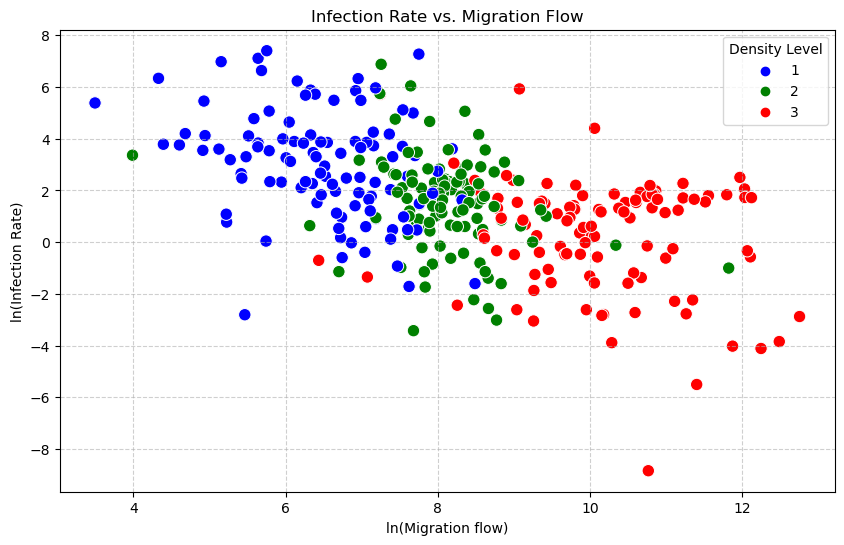

In [11]:
custom_palette = {1: 'blue', 2: 'green', 3: 'red'}
plt.figure(figsize=(10, 6))  
scatter_plot = sns.scatterplot(x='mf', y='roi', hue='density_level', data=sum_cases_copy,palette=custom_palette, s=80) 
scatter_plot.legend(title='Density Level')
scatter_plot.set_title('Infection Rate vs. Migration Flow')
scatter_plot.set_xlabel('ln(Migration flow)')
scatter_plot.set_ylabel('ln(Infection Rate)')

plt.grid(True, linestyle='--', alpha=0.6);

r_i =  -0.51 * mf + -0.43 * density_level + 6.69
                            OLS Regression Results                            
Dep. Variable:                    roi   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     61.53
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           2.63e-23
Time:                        23:59:06   Log-Likelihood:                -669.63
No. Observations:                 320   AIC:                             1345.
Df Residuals:                     317   BIC:                             1357.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

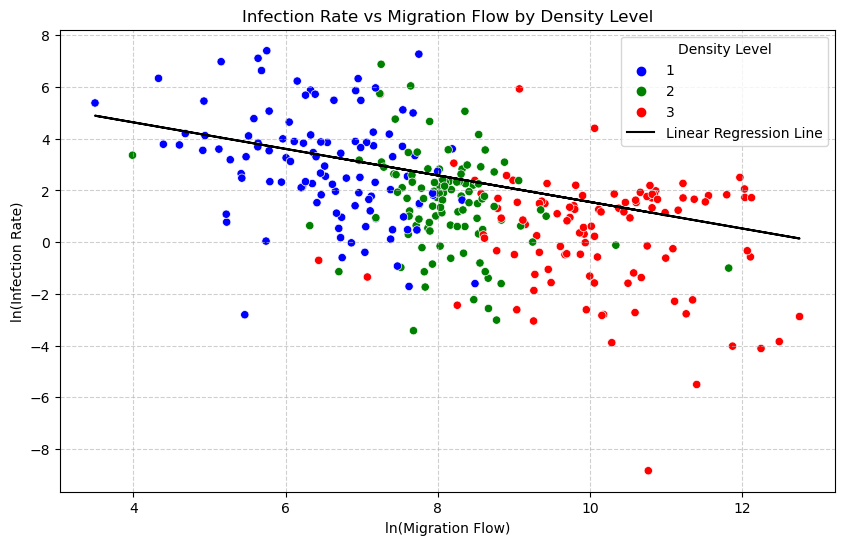

In [12]:
X = np.c_[np.ones(320), sum_cases_copy['mf'], sum_cases_copy['density_level']]
tmp = np.linalg.inv(np.matmul(np.transpose(X), X))
result1 = tmp @ np.transpose(X) @ sum_cases_copy['roi']
print(f'r_i =  {result1[1]:0.2f} * mf + {result1[2]:0.2f} * density_level + {result1[0]:0.2f}')
X_2 = sum_cases_copy[[ 'mf','density_level']]
X_2 = sm.add_constant(X_2)
y_2 = sum_cases_copy['roi']

model = sm.OLS(y_2, X_2).fit()
slope = model.params['mf']
intercept = model.params['const']
print(model.summary())
plt.figure(figsize=(10, 6))

scatter_plot = sns.scatterplot(x='mf', y='roi', hue='density_level', data=sum_cases_copy, palette=custom_palette)
x_values = sum_cases_copy['mf']
linear_regression_line = slope * x_values + intercept
plt.plot(x_values, linear_regression_line, color='black', label='Linear Regression Line')

scatter_plot.set_title('Infection Rate vs Migration Flow by Density Level')
scatter_plot.set_xlabel('ln(Migration Flow)')
scatter_plot.set_ylabel('ln(Infection Rate)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Density Level')
plt.show()

__However, it is important to correctly analyze the obtained regression since the data was transformed into logarithms.__

Both dependent/response variable and independent/predictor variable(s) are log-transformed. 

 "Interpret the coefficient as the percent increase in the dependent variable for every 1% increase in the independent variable." 
 
 $$\ln(r_i) =  -0.51 \ln(mf) -0.43 pd + \ln(6.25)$$
 
 but here pd is not significant so...
 
  $$\ln(r_i) =  -0.51 \ln(mf) + \ln(6.25)$$
 

In [13]:
sum_cases_copy['Interaction Term'] = (sum_cases_copy['mf'] * sum_cases_copy['density_level']);
X_4 = sum_cases_copy[['mf', 'density_level', 'Interaction Term']]
X_4 = sm.add_constant(X_4)
y_3 = sum_cases_copy['roi']

model_2 = sm.OLS(y_3, X_4).fit();
results_2 = model_2.summary();
print(results_2)
coefficients = model_2.params

print(coefficients)
print(f'r_i =  {coefficients[1]:0.2f} * mf + {coefficients[2]:0.2f} * pd + {coefficients[3]:0.2f} * it + {coefficients[0]:0.2f}')

                            OLS Regression Results                            
Dep. Variable:                    roi   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     42.14
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           6.23e-23
Time:                        23:59:18   Log-Likelihood:                -668.27
No. Observations:                 320   AIC:                             1345.
Df Residuals:                     316   BIC:                             1360.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                9.1741      1.630  

 
 $$\ln(r_i) =  -0.85 \ln(mf) -1.62 pd + 0.15 it + \ln(9.17)$$

Adding the interaction effect between factors makes population density significant in the response variable

 $$\ln(r_i) =  -0.85 \ln(mf) -1.62 pd + \ln(9.17)$$

# Groups analysis

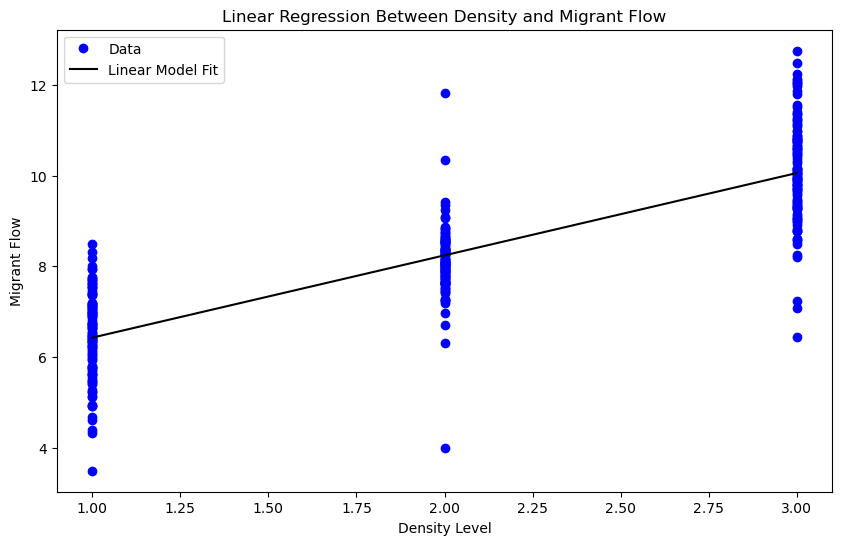

In [14]:
X_m = np.c_[np.ones(len(sum_cases_copy)), sum_cases_copy['density_level']]
y_m = sum_cases_copy['mf']
X_m = sm.add_constant(X_m)
model = sm.OLS(y_m, X_m).fit()
INTERCEPT2, SLOPE2 = model.params[0], model.params[1]
tempx2 = [1, 2, 3]
plotting_temp2 = [SLOPE2 * x + INTERCEPT2 for x in tempx2]
plt.figure(figsize=(10, 6))
plt.plot(sum_cases_copy['density_level'], sum_cases_copy['mf'], 'bo', label='Data')
plt.plot(tempx2, plotting_temp2, 'k-', label='Linear Model Fit')
plt.ylabel('Migrant Flow')
plt.xlabel('Density Level')
plt.title('Linear Regression Between Density and Migrant Flow')
plt.legend();

In [15]:
X_d = sum_cases_copy['density_level']
X_d = sm.add_constant(X_d)
model_d = sm.OLS(y_m, X_d).fit()
print("Linear Regression for 'density_level' vs 'roi'")
print(model_d.summary())

Linear Regression for 'density_level' vs 'roi'
                            OLS Regression Results                            
Dep. Variable:                     mf   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     724.0
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           5.92e-84
Time:                        00:04:23   Log-Likelihood:                -447.80
No. Observations:                 320   AIC:                             899.6
Df Residuals:                     318   BIC:                             907.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                    roi   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     96.18
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           5.21e-20
Time:                        01:10:04   Log-Likelihood:                -679.83
No. Observations:                 320   AIC:                             1364.
Df Residuals:                     318   BIC:                             1371.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3170      0.301     14.341      0.0

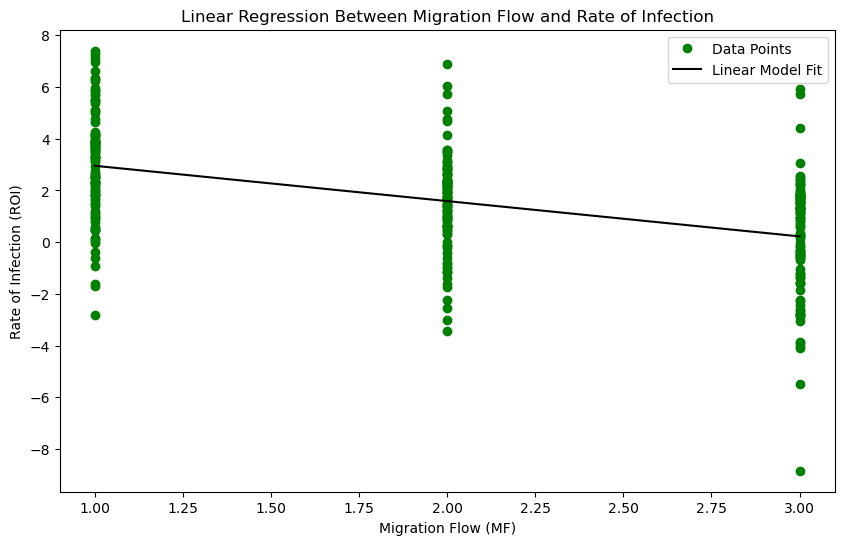

In [22]:
X_d = np.c_[np.ones(len(sum_cases_copy)), sum_cases_copy['density_level']]
y_d = sum_cases_copy['roi']
X_d = sm.add_constant(X_d)

model_2 = sm.OLS(y_d, X_d).fit()
print(model_2.summary())
INTERCEPT2, SLOPE2 = model_2.params[0], model_2.params[1]

tempx3 = [1, 2, 3]
plotting_temp3 = [SLOPE2 * x + INTERCEPT2 for x in tempx3]
plt.figure(figsize=(10, 6)) 
plt.plot(sum_cases_copy['density_level'], sum_cases_copy['roi'], 'go')
plt.plot(tempx3, plotting_temp3, 'k-')
plt.ylabel('Rate of Infection (ROI)')
plt.xlabel('Migration Flow (MF)')
plt.title('Linear Regression Between Migration Flow and Rate of Infection')
plt.legend(['Data Points', 'Linear Model Fit'])
plt.show()